<a href="https://colab.research.google.com/github/RuslanFF1968/Pioneer/blob/main/Data_type_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data storage types - hashing problems






##Task
A hash table is to be added with the following keys:
‘abdfg’, ‘acbfg’,’grace’,’fbgad’,’ccabfg’ which keys may meet a collision if the hashing algorithm looks like this:
sorted characters in the key.


In [ ]:
keys = ['abdfg', 'acbfg', 'grace', 'fbgad', 'ccabfg']

# def hash_func(key):
#     return sorted(key)

sorted_keys = {}
for key in keys:
    sorted_key = sorted(key)
    if sorted_key not in sorted_keys.values():
        sorted_keys[key] = sorted_key
    else:
        hashed = ''
        for x in sorted_key: hashed += x
        print(f'Коллизия: {key} становится {hashed}')

Коллизия: fbgad становится abdfg


##Task 2
Using a Prefix tree, implement tree cases for the following words: «симфония», «симбиоз», «Симферополь», «Сим-карта», «синхрофазатрон» ,»Символизм»


In [ ]:
import networkx as nx
import math
import matplotlib as plt
import numpy as np
import re

In [ ]:
words = ['симфония', 'симбиоз', 'симферополь', 'сим-карта', 'синхрофазатрон', 'символизм']
tree = {}
max_len = max([len(w) for w in words])

In [ ]:
for word_num, word in enumerate(words): # добавим '_' для выравнивания слов по длине
    for n in range(max_len):
        try:
            word[n]
        except IndexError:
            word += '_'
    words[word_num] = word

In [ ]:
words

['симфония______',
 'симбиоз_______',
 'симферополь___',
 'сим-карта_____',
 'синхрофазатрон',
 'символизм_____']

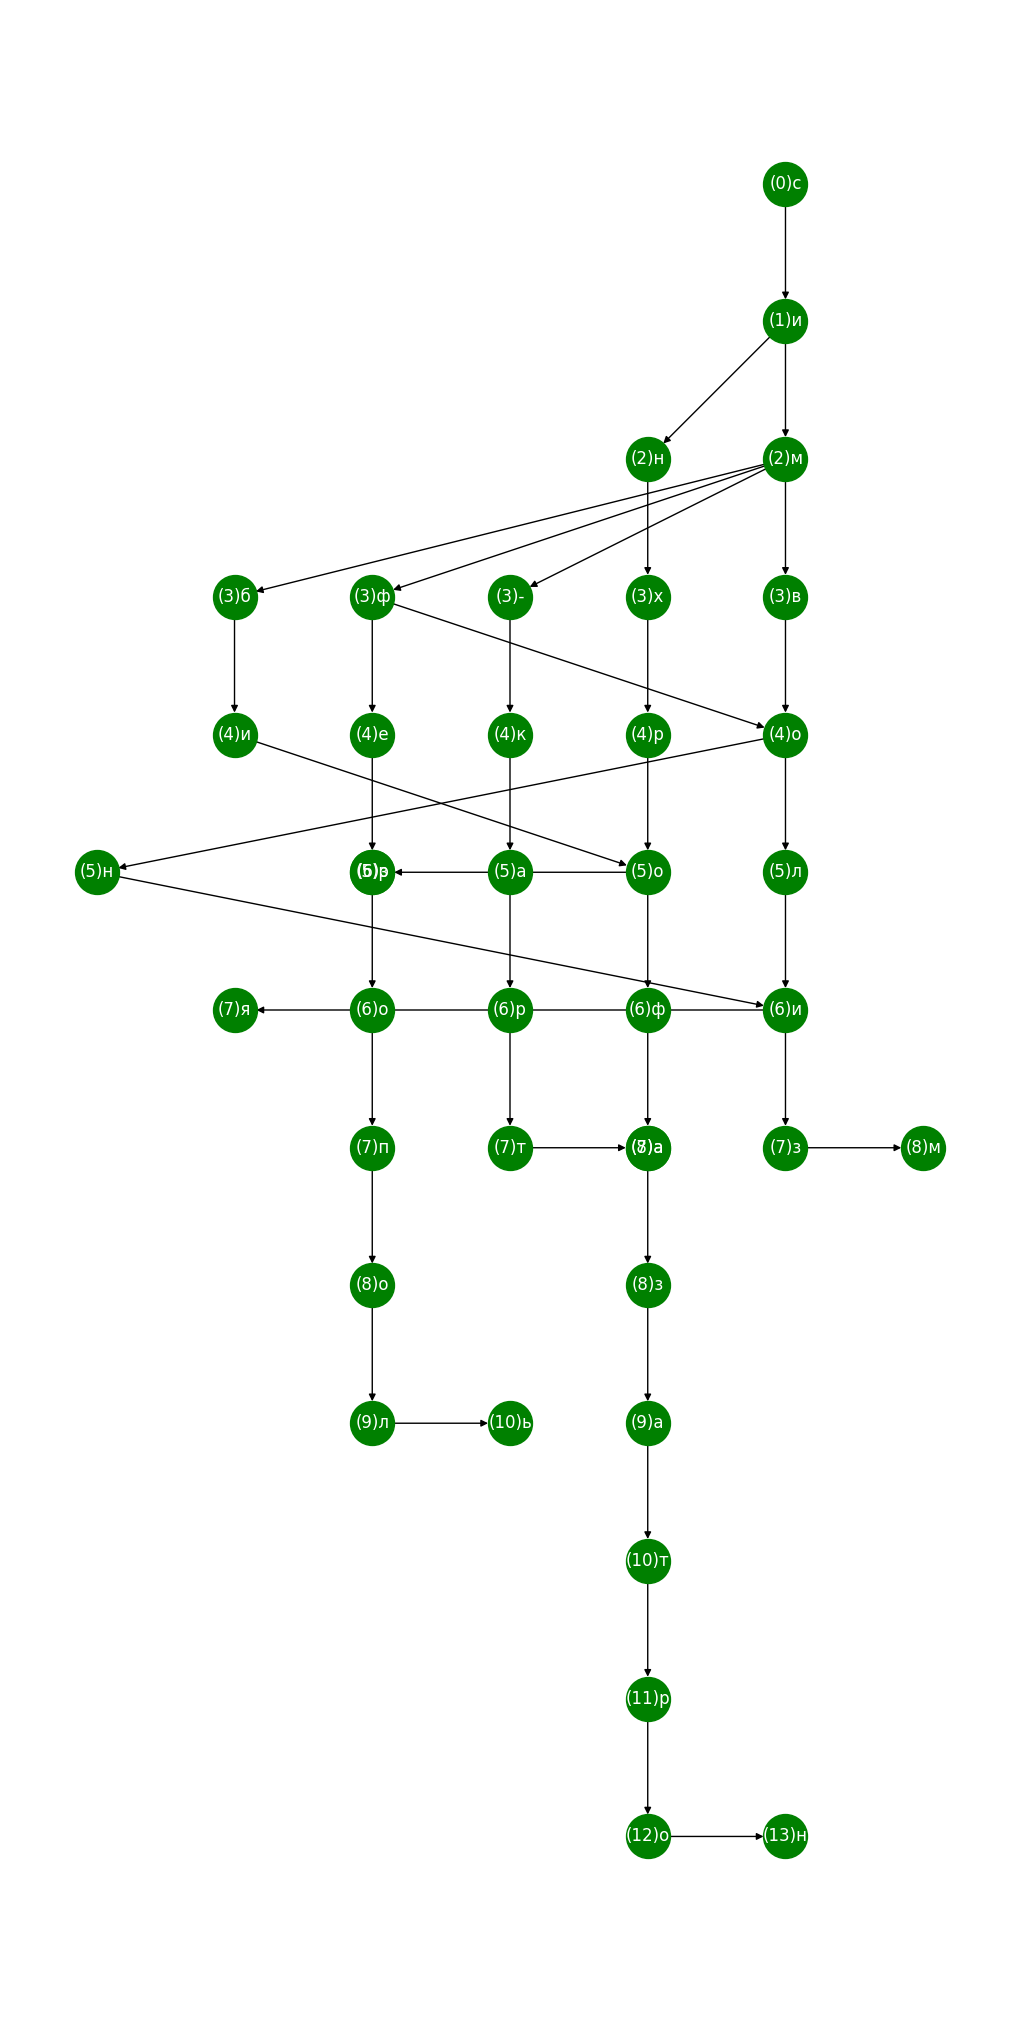

In [ ]:
plt.rcParams['figure.figsize'] = 10, 20
G = nx.DiGraph()

for num_word, word in enumerate(words): # проходим по всем словам
    x_prev_pos = 1
    x_cur_pos = 1
    for char_num in range(max_len-1): # проходим по всем буквам в слове
        x_cur_pos = num_word + max_len / 3
        prev_name = '('+str(char_num)+')'+word[char_num]
        cur_name = '('+str(char_num+1)+')'+word[char_num+1]
        # print(prev_name, cur_name)
        if cur_name[-1] == '_':
            continue
        prev_node = G.add_node(prev_name, pos=(x_cur_pos-1, max_len-char_num))
        cur_node = G.add_node(cur_name, pos=(x_cur_pos, max_len-char_num))
        G.add_edge(prev_name, cur_name)

pos = nx.get_node_attributes(G,'pos')
nx.draw(G,
        pos,
        with_labels=True, node_color='g', node_size=1000, font_color='w')

In [ ]:
plt.rcParams['figure.figsize'] = 10, 20
G = nx.DiGraph()

for num_word, word in enumerate(words):
    x_prev_pos = 1
    x_cur_pos = 1
    for char_num in range(max_len-1):
        chars_diff = len(set([w[char_num] for w in words]))
        print(chars_diff)
        x_cur_pos = num_word + max_len / 3
        prev_name = '('+str(char_num)+')'+word[char_num]
        cur_name = '('+str(char_num+1)+')'+word[char_num+1]
        # print(prev_name, cur_name)
        if cur_name[-1] == '_':
            continue
        prev_node = G.add_node(prev_name, pos=(x_cur_pos-1, max_len-char_num))
        cur_node = G.add_node(cur_name, pos=(x_cur_pos, max_len-char_num))
        G.add_edge(prev_name, cur_name)

pos = nx.get_node_attributes(G,'pos')
# nx.draw(G,
#         pos,
#         with_labels=True, node_color='g', node_size=1000, font_color='w')

1
1
2
5
5
5
5
6
5
3
3
2
2
1
1
2
5
5
5
5
6
5
3
3
2
2
1
1
2
5
5
5
5
6
5
3
3
2
2
1
1
2
5
5
5
5
6
5
3
3
2
2
1
1
2
5
5
5
5
6
5
3
3
2
2
1
1
2
5
5
5
5
6
5
3
3
2
2


In [ ]:
pos

{'(0)с': (8.666666666666668, 14),
 '(1)и': (8.666666666666668, 13),
 '(2)м': (8.666666666666668, 12),
 '(3)ф': (5.666666666666667, 11),
 '(4)о': (8.666666666666668, 10),
 '(5)н': (3.666666666666667, 9),
 '(6)и': (8.666666666666668, 8),
 '(7)я': (4.666666666666667, 8),
 '(3)б': (4.666666666666667, 11),
 '(4)и': (4.666666666666667, 10),
 '(5)о': (7.666666666666668, 9),
 '(6)з': (5.666666666666667, 9),
 '(4)е': (5.666666666666667, 10),
 '(5)р': (5.666666666666667, 9),
 '(6)о': (5.666666666666667, 8),
 '(7)п': (5.666666666666667, 7),
 '(8)о': (5.666666666666667, 6),
 '(9)л': (5.666666666666667, 5),
 '(10)ь': (6.666666666666667, 5),
 '(3)-': (6.666666666666667, 11),
 '(4)к': (6.666666666666667, 10),
 '(5)а': (6.666666666666667, 9),
 '(6)р': (6.666666666666667, 8),
 '(7)т': (6.666666666666667, 7),
 '(8)а': (7.666666666666667, 7),
 '(2)н': (7.666666666666668, 12),
 '(3)х': (7.666666666666668, 11),
 '(4)р': (7.666666666666668, 10),
 '(6)ф': (7.666666666666668, 8),
 '(7)а': (7.666666666666668, 